# Project: Movie Revenues by genre and budget

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
> In this analysis I will be exploring data from TMDb Movie Data Set. It contains information about 10,000 movies including genres and revenue. I am curious to see if movie budget or genre of the film will make an impact on the film's revenue once it is released. I want to know if movies with a larger budget end up with larger revenues when released? Or does the genre of the movie result in higher or lower revenue?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import csv
%matplotlib inline
import matplotlib.pyplot as plt

<a id='wrangling'></a>
## Data Wrangling

> In this section I take some time to go through the movie data to get familiar with the data set and see what clean up I will need to do.

### General Properties

> First, I load the csv file into the notebook and print out the first 5 rows

In [2]:
df = pd.read_csv("tmdb-movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


> I noticed that the columns genres and cast used a "|" to separate values. I will need to make sure that I remove this symbol when I start my analysis.

> The next step I take is to look at a summary of the info to see if there are any missing values.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

> There are 8 columns that have missing data. I will address the null values in the data cleaning section.

> The last step I do is descriptive stats for int and/or float columns in the data set.

In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Data Cleaning of null values and the genres column

> In this section I will clean up the data set to make it easier to analyze and be ready for visualizations.

In [5]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

> It looks like I have a few null values. I will replace those with '0'

In [6]:
new_df = df.fillna(0)

> Once I filled in the null values I will now check for dulplicates and remove them.

In [7]:
sum(new_df.duplicated())
new_df.drop_duplicates(inplace = True)
new_df.shape

(10865, 21)

> Since I only need a few columns for my analysis I am going to cut down the data set to the columns I need. This will make it easier to read.

In [8]:
#remove columns that won't be used for analysis
new_df.drop(['cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'runtime', 'release_date', 'vote_count', 'vote_average', 'release_year'], axis = 1, inplace = True)
new_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,genres,production_companies,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,1.747999e+08,1.385749e+09


<a id='eda'></a>
## Exploratory Data Analysis


### Question 1: Do movies with a larger budget have higher revenue when released?

> My hypothesis is that there is a positive correlation between budget and revenue for a movie. I believe that a movie with a larger budget will produce higher revenues. I will also look at the production companies associated with the budgets of movies to see if that also can contribute to higher revenue when the movie is released.

>Since the production companies column uses a "|" to separate the production companies associated with the movie I will need to remove that symbol in order to do my analysis. I also want to see which companies are the most popular in this data set so I will also include counting the production companies in my function.

In [9]:
def remove_symbol(column):
    #separate the string by '|'
    data = new_df[column].str.split('|')
    
     #arrange in descending order
    count = data.value_counts(ascending = False)
    
    return count

In [10]:
companies = remove_symbol('production_companies')
companies.head(10)

[Paramount Pictures]                        156
[Universal Pictures]                        133
[Warner Bros.]                               84
[Walt Disney Pictures]                       76
[Metro-Goldwyn-Mayer (MGM)]                  72
[Columbia Pictures]                          72
[New Line Cinema]                            61
[Touchstone Pictures]                        51
[20th Century Fox]                           50
[Twentieth Century Fox Film Corporation]     49
Name: production_companies, dtype: int64

Text(0, 0.5, 'Count of production company in data set')

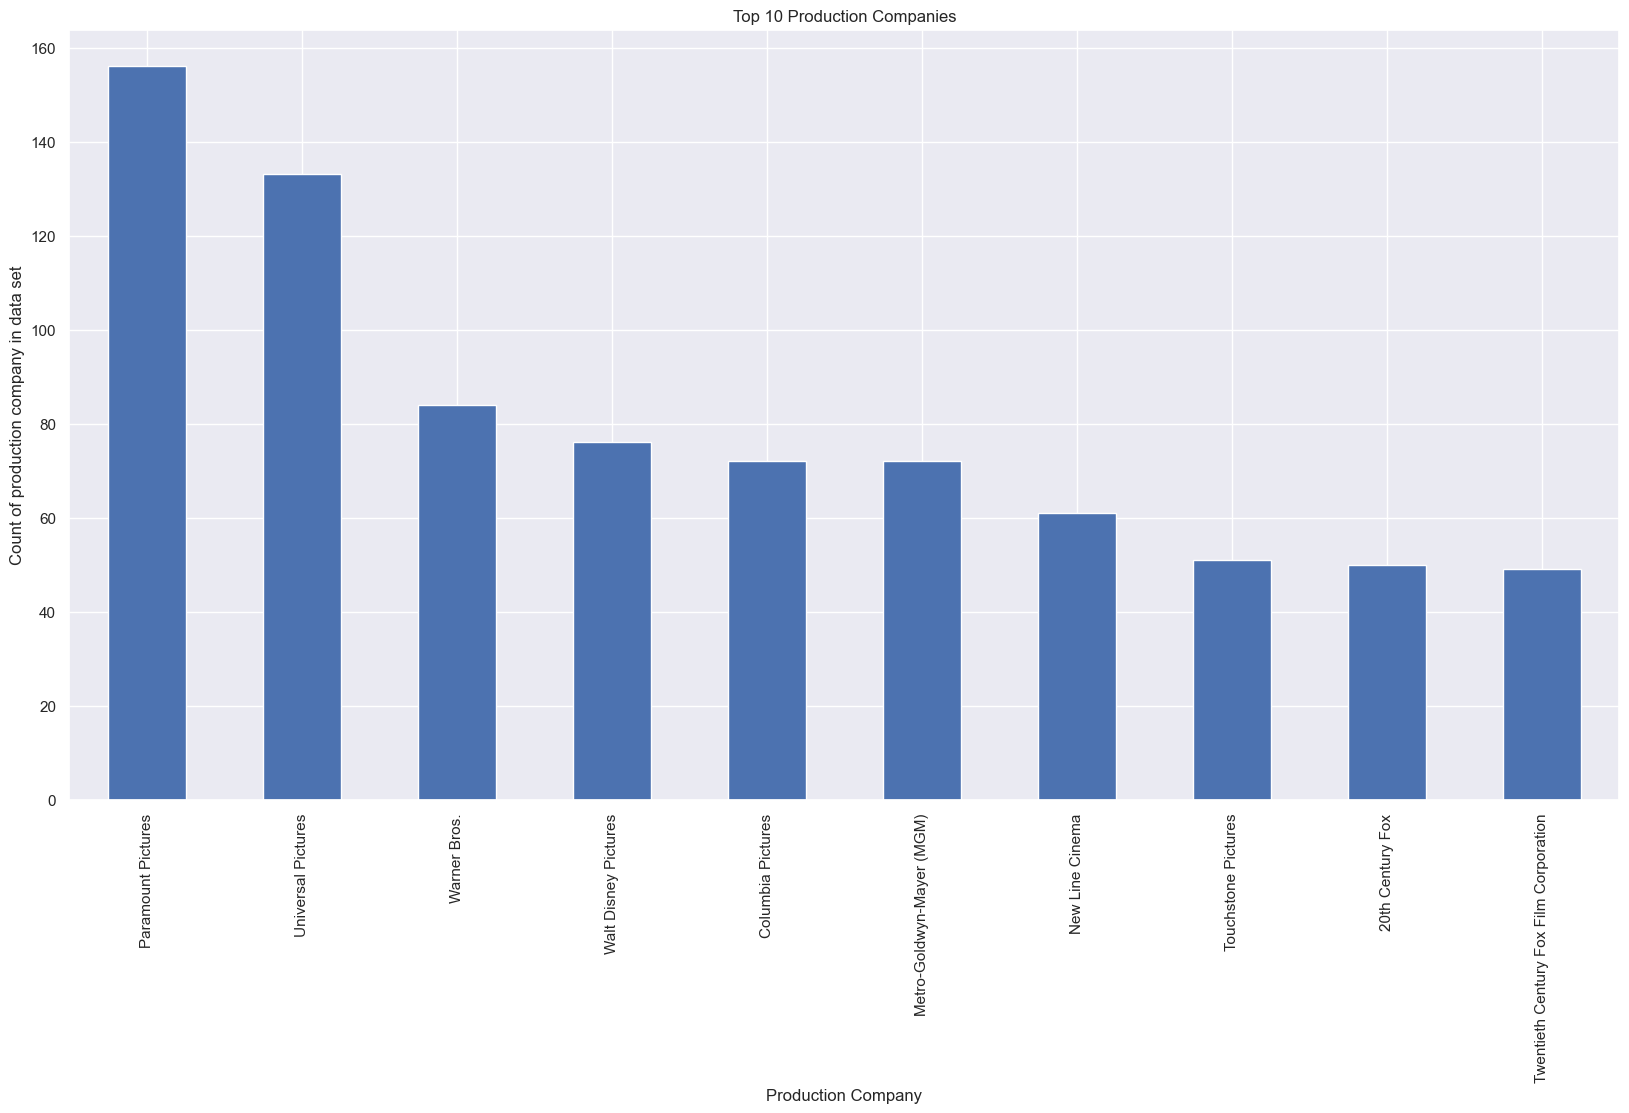

In [24]:
#plot companies in descending order for graph
companies.sort_values(ascending = True, inplace = True)

#narrow down to top 10
top_10 = (df['production_companies'].value_counts()).iloc[:10]

#create bar chart
top_10.plot(kind='bar', title = "Top 10 Production Companies")
plt.xlabel('Production Company')
plt.ylabel('Count of production company in data set')

> Now that I have cleaned up the production companies column and counted the frequency that the companies appear int he data set. I know that Paramount Pictures is the most popular production company in the data set. Now let's see if they also bring in the most revenue.

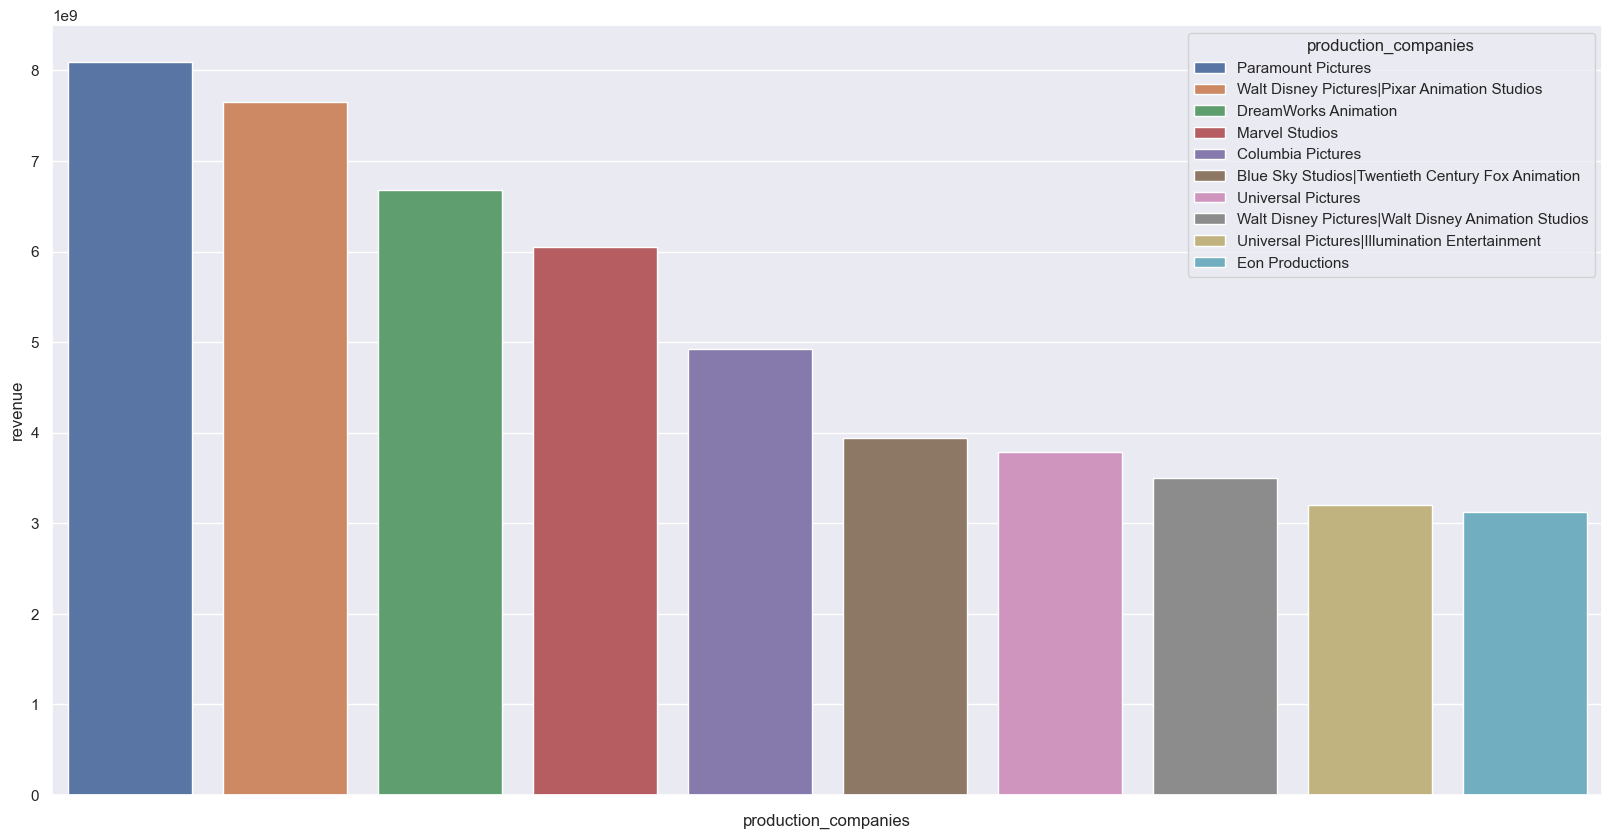

In [15]:
sns.set(rc={'figure.figsize':(20,10)})

company_rev = new_df.groupby('production_companies', as_index=False)['revenue'].sum().sort_values(by='revenue', ascending=False).head(10)
sns.barplot(data=company_rev, x='production_companies', y='revenue', hue='production_companies', dodge=False).set(xticklabels=[]);

> From the graph above, it looks like Paramount Pictures is the top production company for revenue.

> Now I want to see if there is a positive correlation between movie budgets and revenue. 

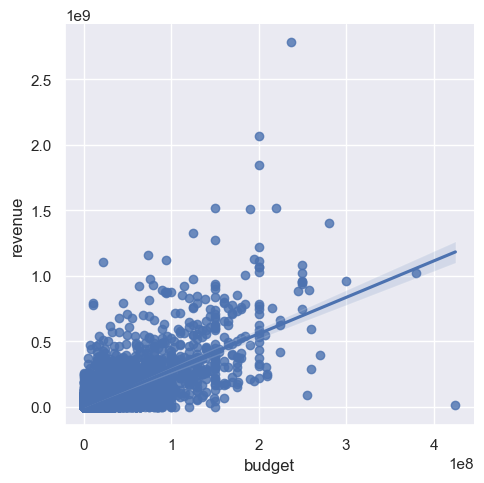

In [16]:
sns.lmplot(x='budget',y='revenue',data=df,fit_reg=True)

> The chart above shows there is a positive correlation between movie budget and revenue. The higher the movie budget the more revenue a movie will bring in.

### Question 2: Which genres of movies generate higher revenues?

> For my next questions I would like to analyze genres. I want to see which genres are the top 10 within the data set and also see which ones produce the most revenue. I will use the function I created above to remove the "|" symbol from the genre set and count how many times each genre appears in the data.

In [17]:
genres = remove_symbol('genres')
genres.head(10)

[Comedy]                    712
[Drama]                     712
[Documentary]               312
[Drama, Romance]            289
[Comedy, Drama]             280
[Comedy, Romance]           268
[Horror, Thriller]          259
[Horror]                    253
[Comedy, Drama, Romance]    222
[Drama, Thriller]           138
Name: genres, dtype: int64

> Comedy is the most popular genre in the data set with Drama following. Now I am going to graph this data so that I can visualize the findings.

Text(0, 0.5, 'Count of genres in data set')

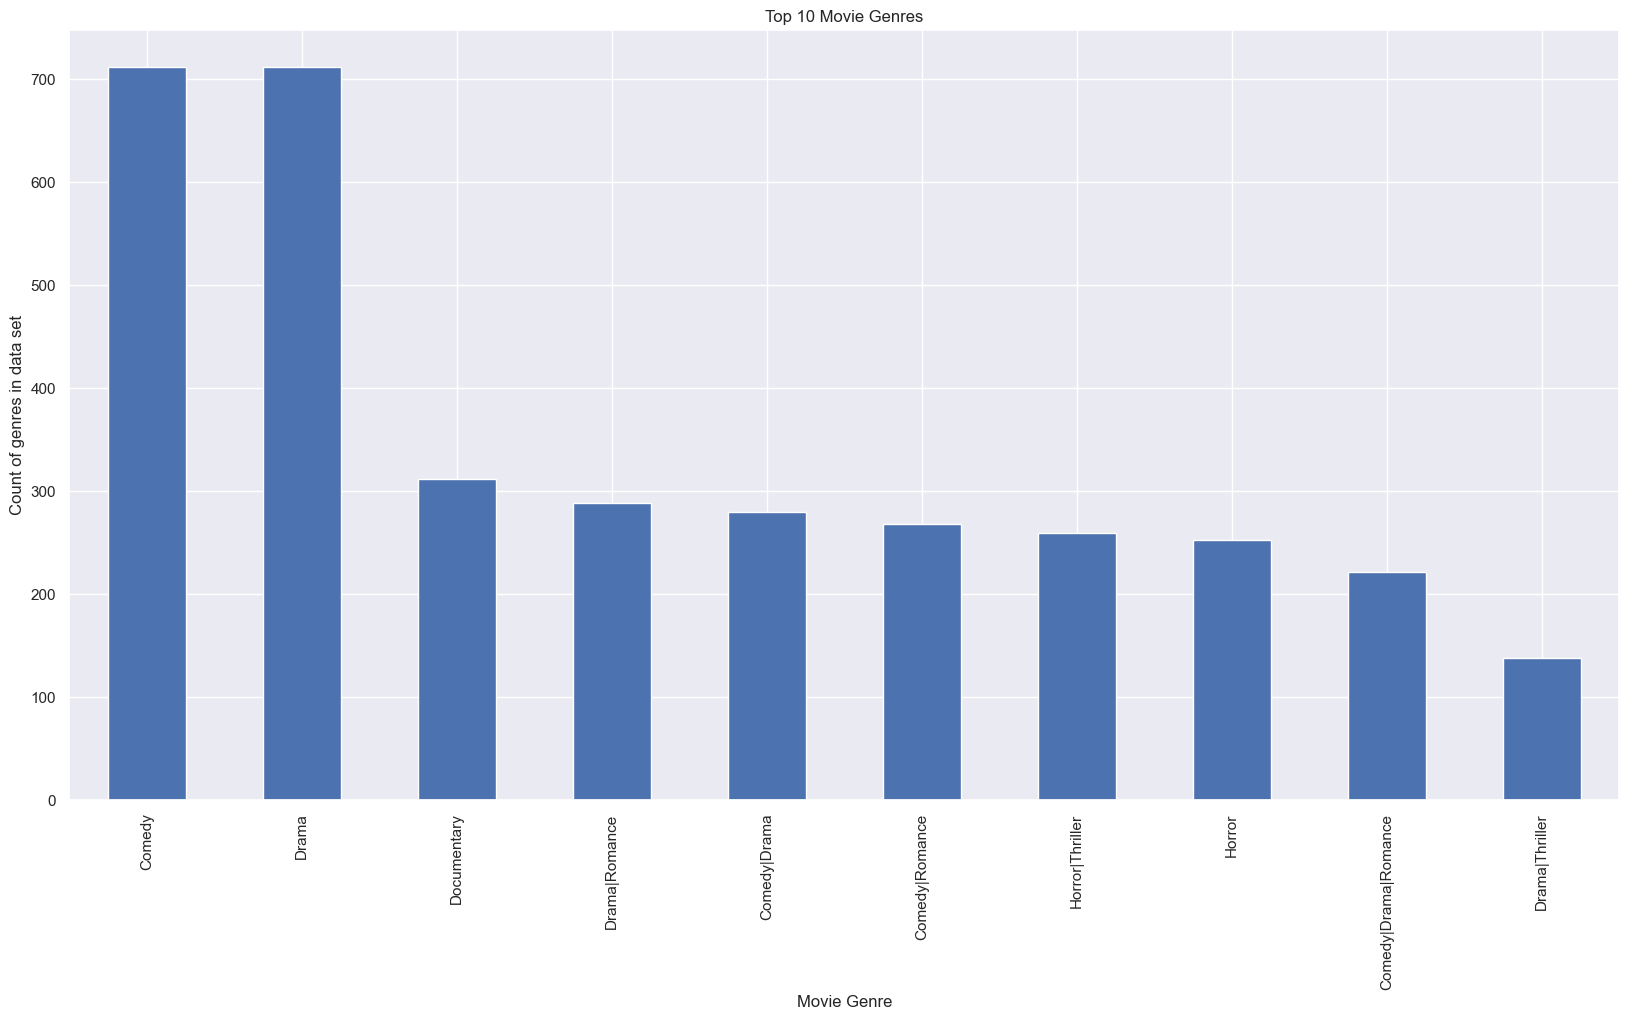

In [25]:
#plot genres in descending order for graph
genres.sort_values(ascending = True, inplace = True)

#narrow down to top 10
gtop_10 = (df['genres'].value_counts()).iloc[:10]

#create bar chart
gtop_10.plot(kind='bar', title = "Top 10 Movie Genres")
plt.xlabel('Movie Genre')
plt.ylabel('Count of genres in data set')

> Now I want to see which genre brings in the most revenue. I will create a graph to see which genre brings in the most revenue.

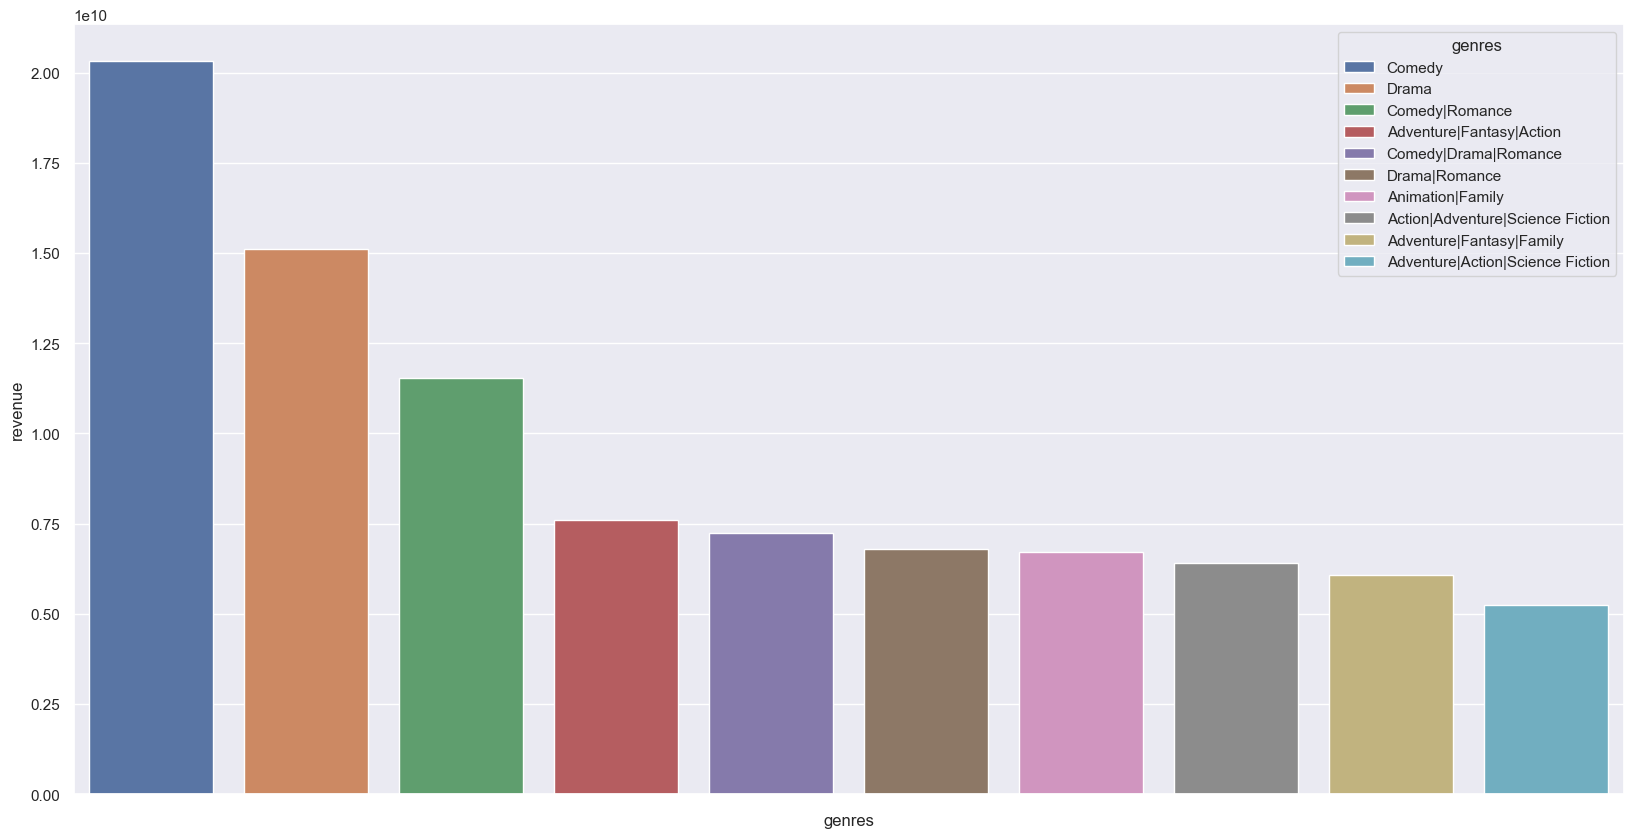

In [19]:
sns.set(rc={'figure.figsize':(20,10)})

genre_rev = new_df.groupby('genres', as_index=False)['revenue'].sum().sort_values(by='revenue', ascending=False).head(10)
sns.barplot(data=genre_rev, x='genres', y='revenue', hue='genres', dodge=False).set(xticklabels=[]);

> This graph shows that comedy brings in the most revenue.

<a id='conclusions'></a>
## Conclusions

> In my analysis I found that there is a correlation between budget and revenue. It appears that that movies with large budgets has a positive association with higher revenues. I also found that Comedy genre brings in the most revenue. These results are very basic correlations that do not prove any cause. 